<a href="https://colab.research.google.com/github/faradishaldina/Faradisha_PCVK/blob/main/Week_11%5BIND%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **FARADISHA ALDINA PUTRI - 2141720159 - TI 3I**

## ***MODUL  11  –  Metode Deteksi Objek:  Template Matching, Edge Detection, Corner Detection Grid Detection, Contour Detection***

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Implementasikan  6  metode  template matching  pada  OpenCV dengan  menggunakan gambar cats_and_bunnies.jpg daN cat2_templatejpg.jpg sebagai templatenya.**

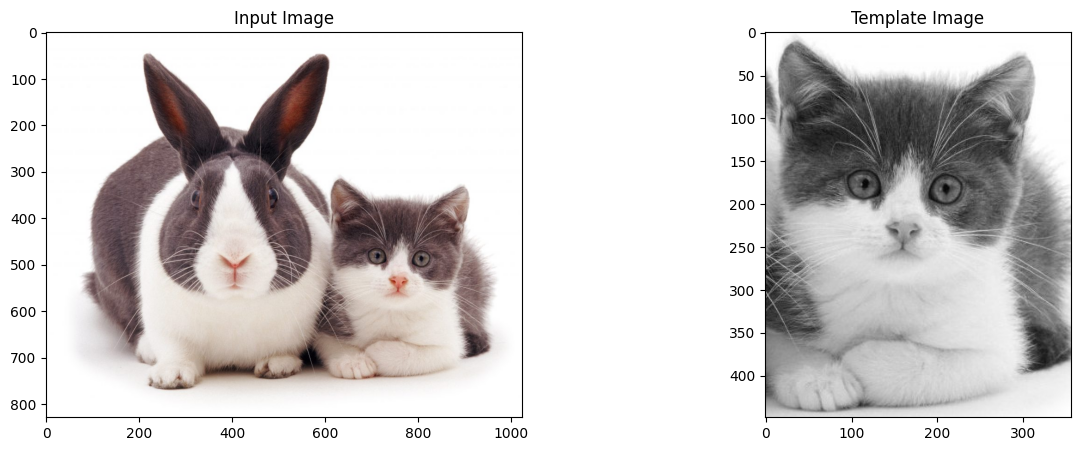

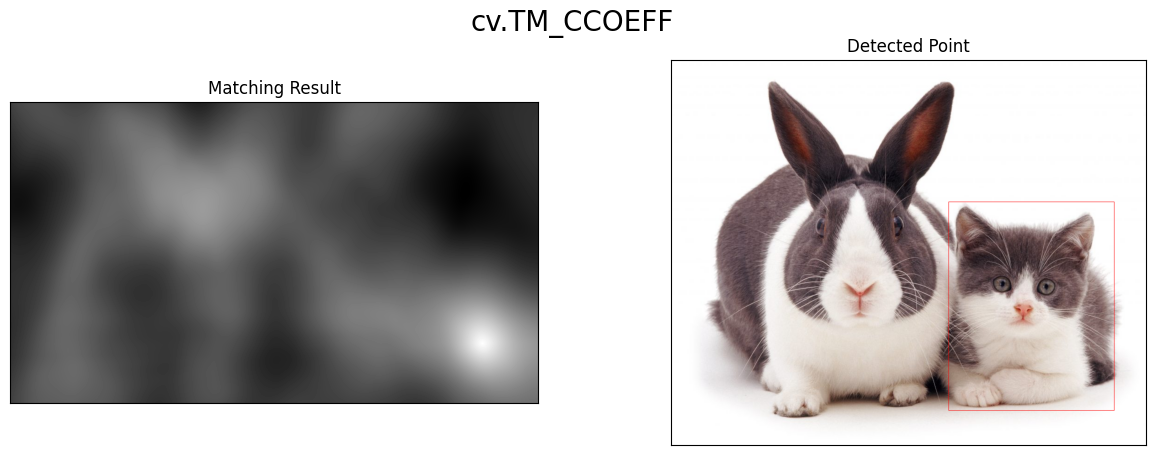

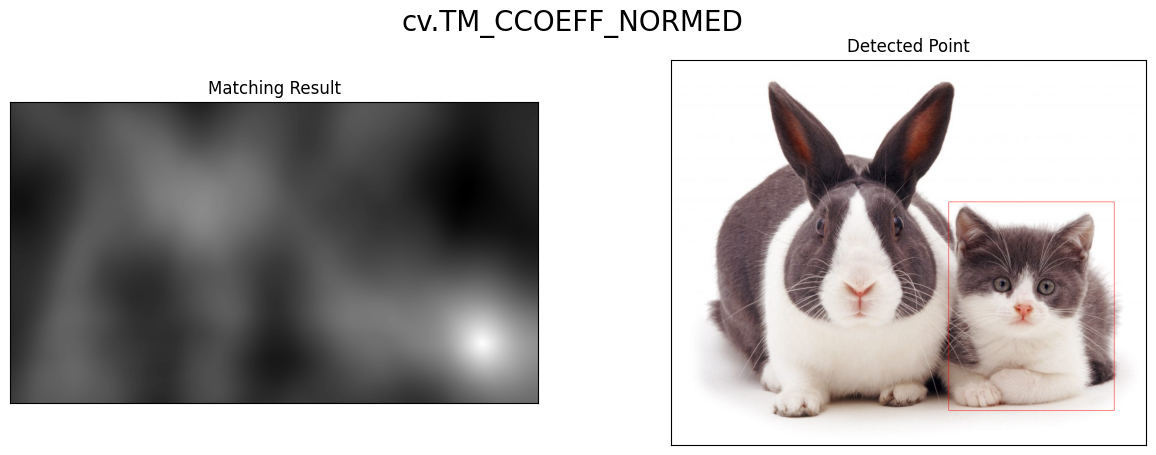

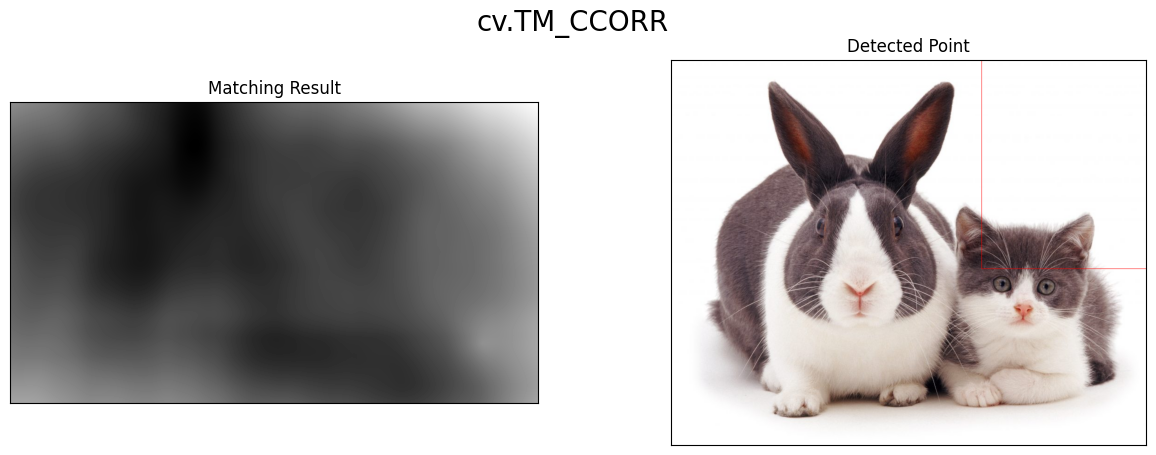

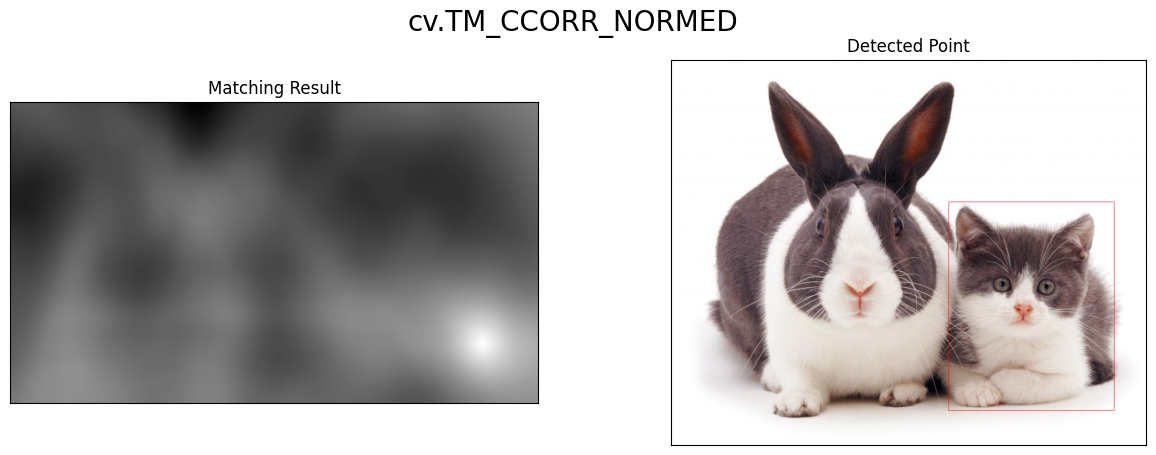

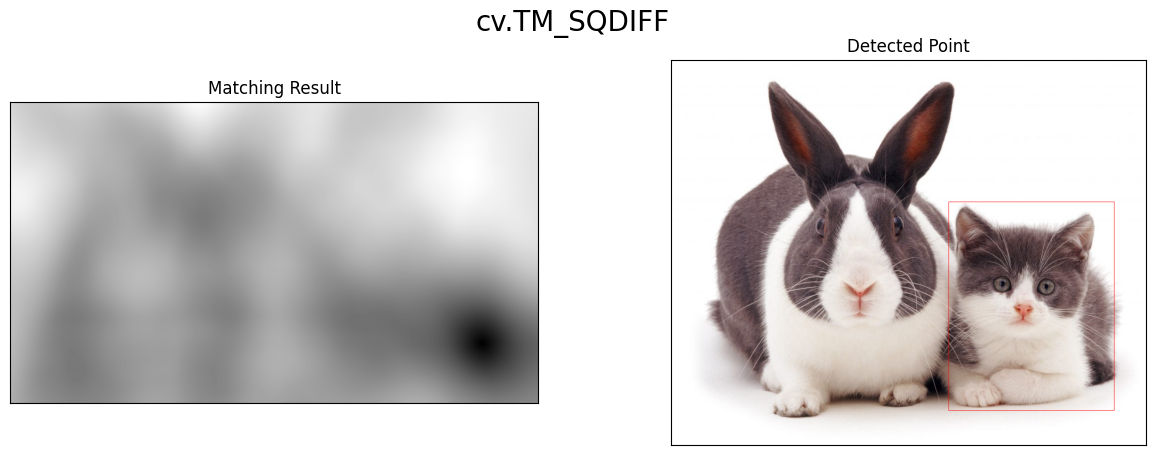

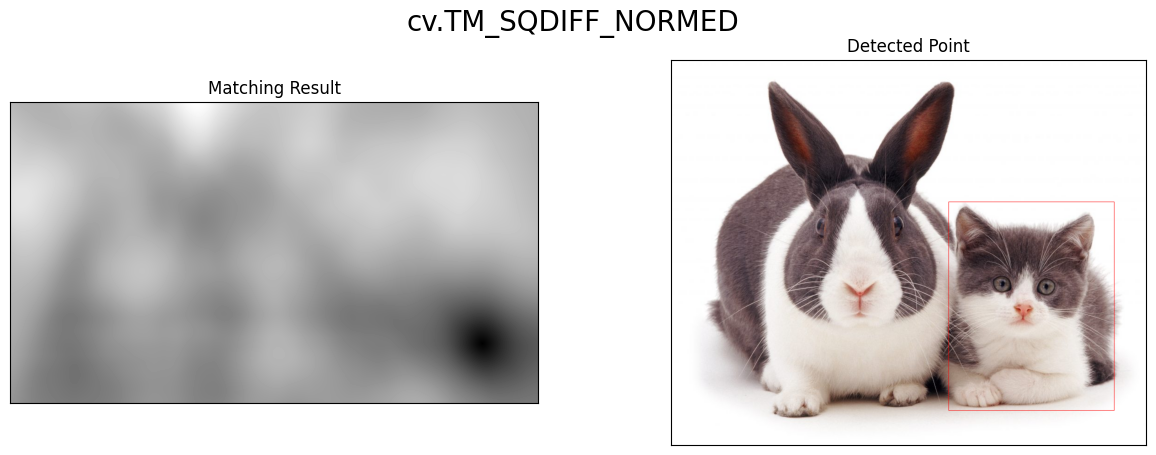

In [3]:

img = cv.imread('/content/drive/MyDrive/PCVK_Fara/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK_Fara/Object Detection/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("Input Image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("Template Image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

**3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain jpg untuk citra masukan dan bahrain-template jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:**

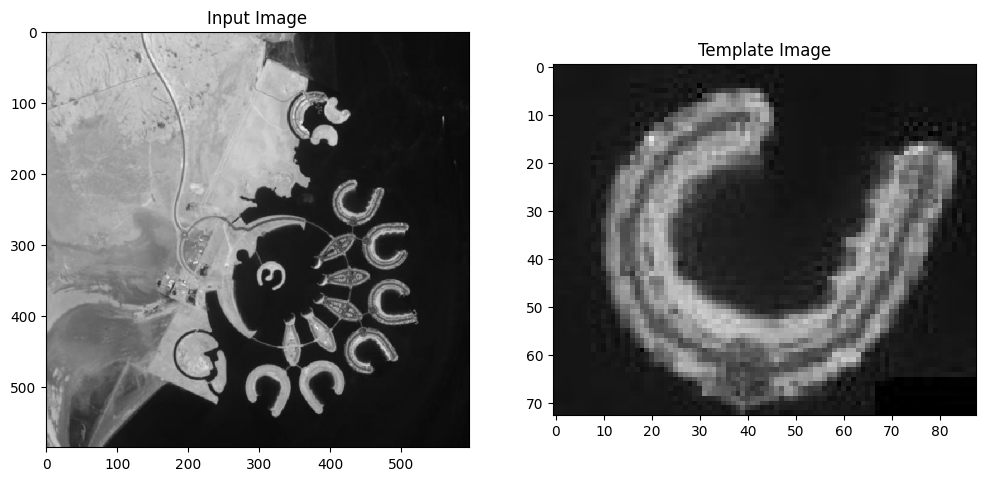

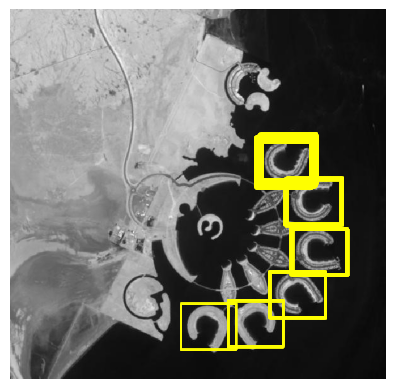

In [4]:
from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/PCVK_Fara/Object Detection/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/PCVK_Fara/Object Detection/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("Input Image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("Template Image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.5)
    ax.add_patch(rect)

plt.show()


**4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:**

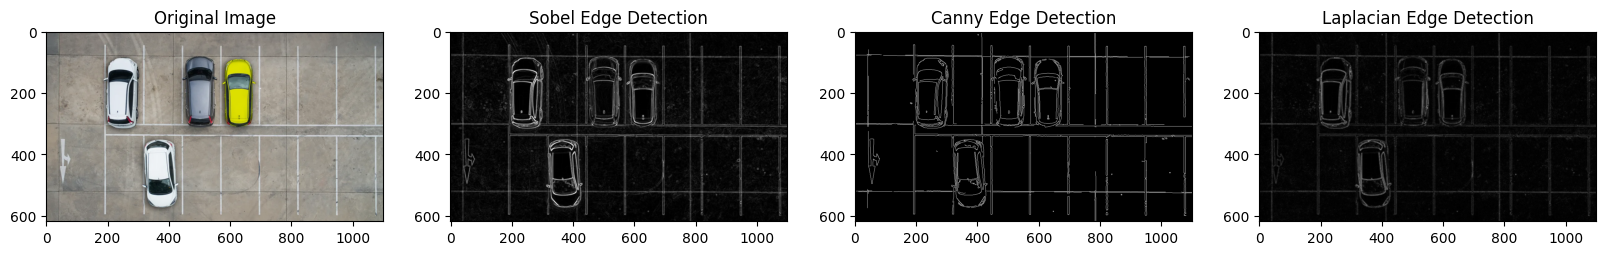

In [5]:
img0 = cv.imread('/content/drive/MyDrive/PCVK_Fara/Object Detection/car-park.jpg')
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(gray, (3, 3), 0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

edges_canny = cv.Canny(img, 100, 200)

img_laplacian = cv.Laplacian(img, cv.CV_64F)
img_laplacian = cv.convertScaleAbs(img_laplacian)

f, axarr = plt.subplots(1, 4, figsize=(20, 5))

axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')

axarr[1].imshow(img_sobelxy, cmap='gray')
axarr[1].set_title('Sobel Edge Detection')

axarr[2].imshow(edges_canny, cmap='gray')
axarr[2].set_title('Canny Edge Detection')

axarr[3].imshow(img_laplacian, cmap='gray')
axarr[3].set_title('Laplacian Edge Detection')

plt.show()

**5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:**

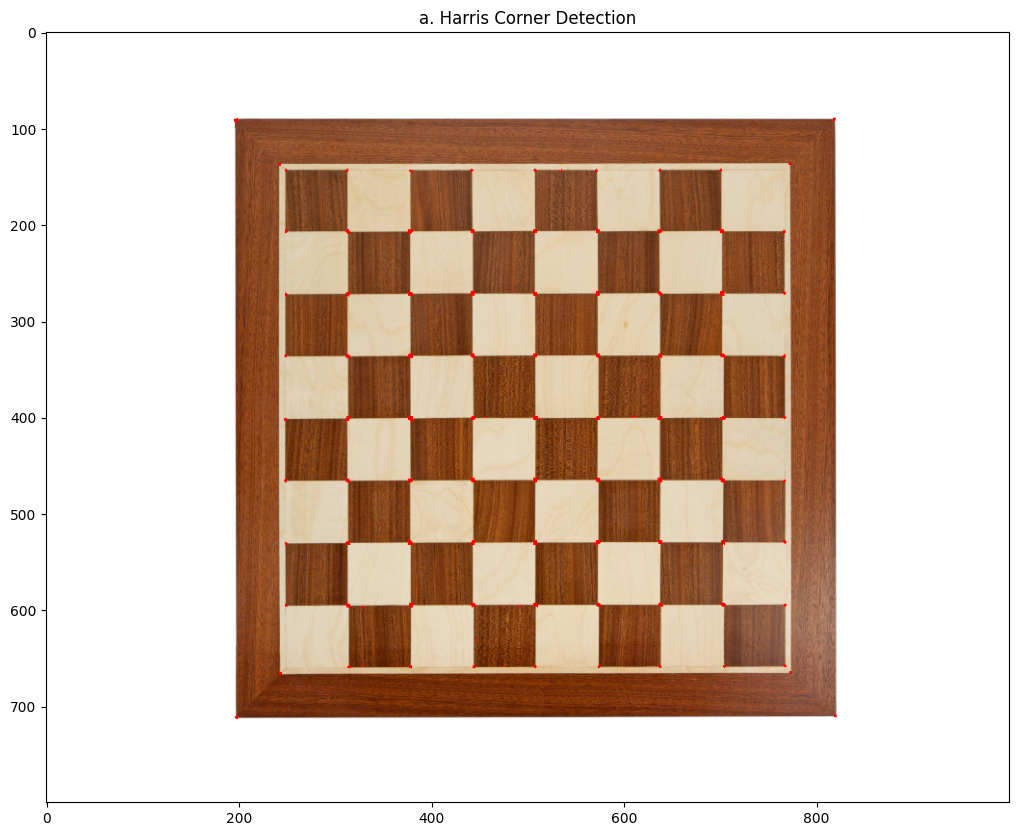

In [6]:
# Load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK_Fara/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img, 3, 1, 0.04)

# Konversi citra ke tipe data float32
gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img, 2, 3, 3)

# Dilasi hasil Harris Corner Detection untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

# Threshold untuk mengoptimalkan nilai
input_img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Tampilkan hasil dengan judul "Harris Corner Detection"
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
plt.title("a. Harris Corner Detection")
plt.show()


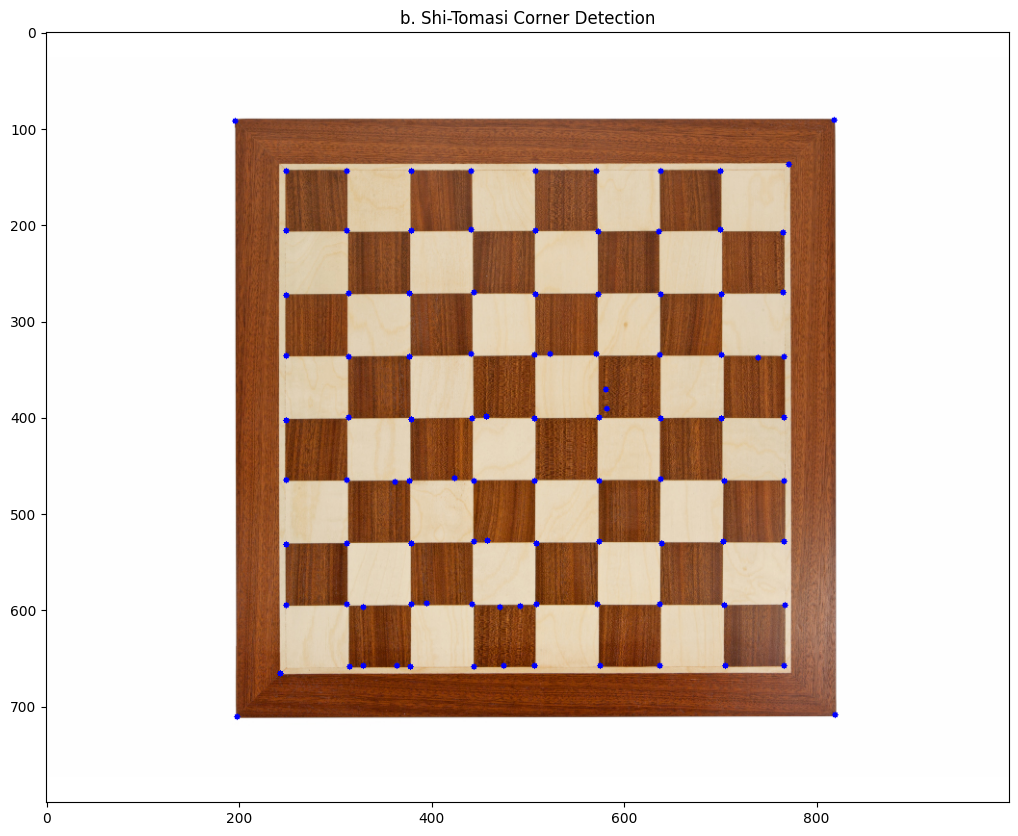

In [7]:
# Load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK_Fara/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

# Parameter untuk Shi-Tomasi Corner Detection
max_corners = 100
quality_level = 0.01
min_distance = 10

# Melakukan Shi-Tomasi Corner Detection
corners = cv.goodFeaturesToTrack(gray_img, max_corners, quality_level, min_distance)

# Mengkonversi koordinat sudut menjadi bilangan bulat
corners = np.int0(corners)

# Menggambar lingkaran pada sudut yang terdeteksi
for i in corners:
    x, y = i.ravel()
    cv.circle(input_img, (x, y), 3, 255, -1)

# Tampilkan hasil dengan judul "Shi-Tomasi Corner Detection"
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
plt.title("b. Shi-Tomasi Corner Detection")
plt.show()

**6. Implementasikan metode HOugh Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:**

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


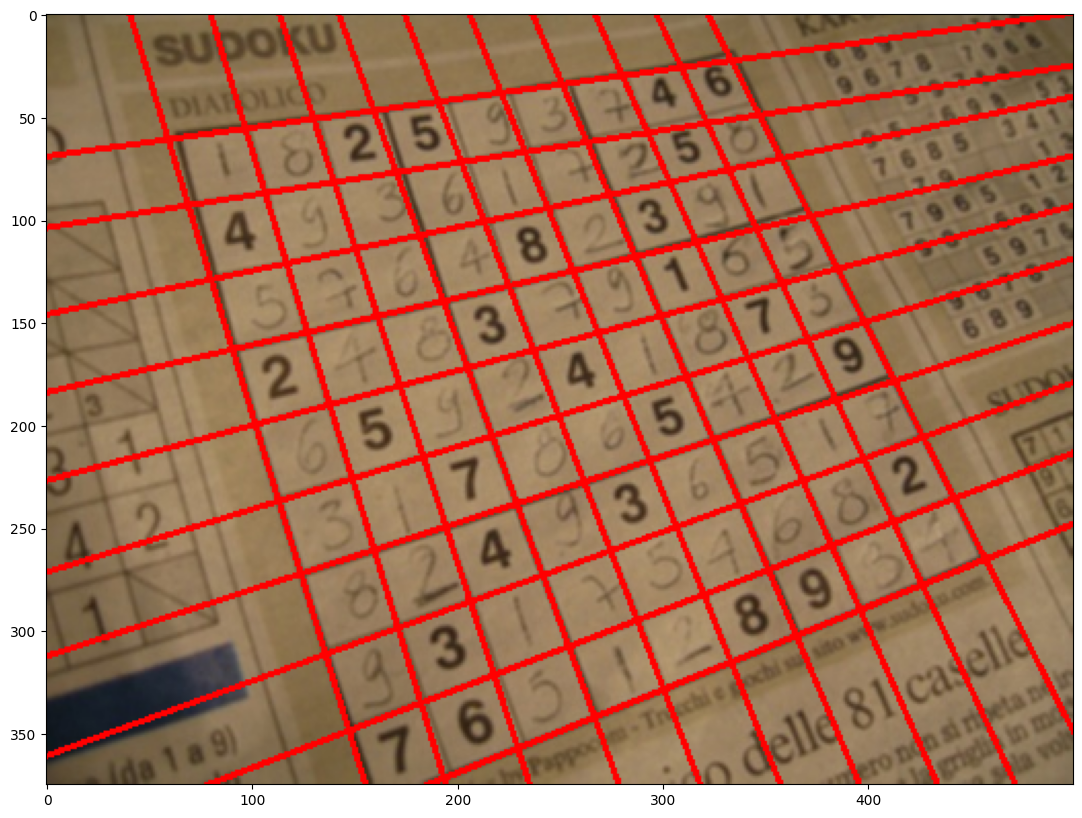

In [8]:
input_img = cv.imread('/content/drive/MyDrive/PCVK_Fara/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)

if not lines.any():
    print('No lines were found')
    exit()
if filter:
    rho_threshold = 15
    theta_threshold = 0.1
    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue
        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)
    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))
    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue
        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []
    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])
            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines
    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)
    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

**7. Implementasikan fungsi findContours() pada OpenCV untuk countour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:**

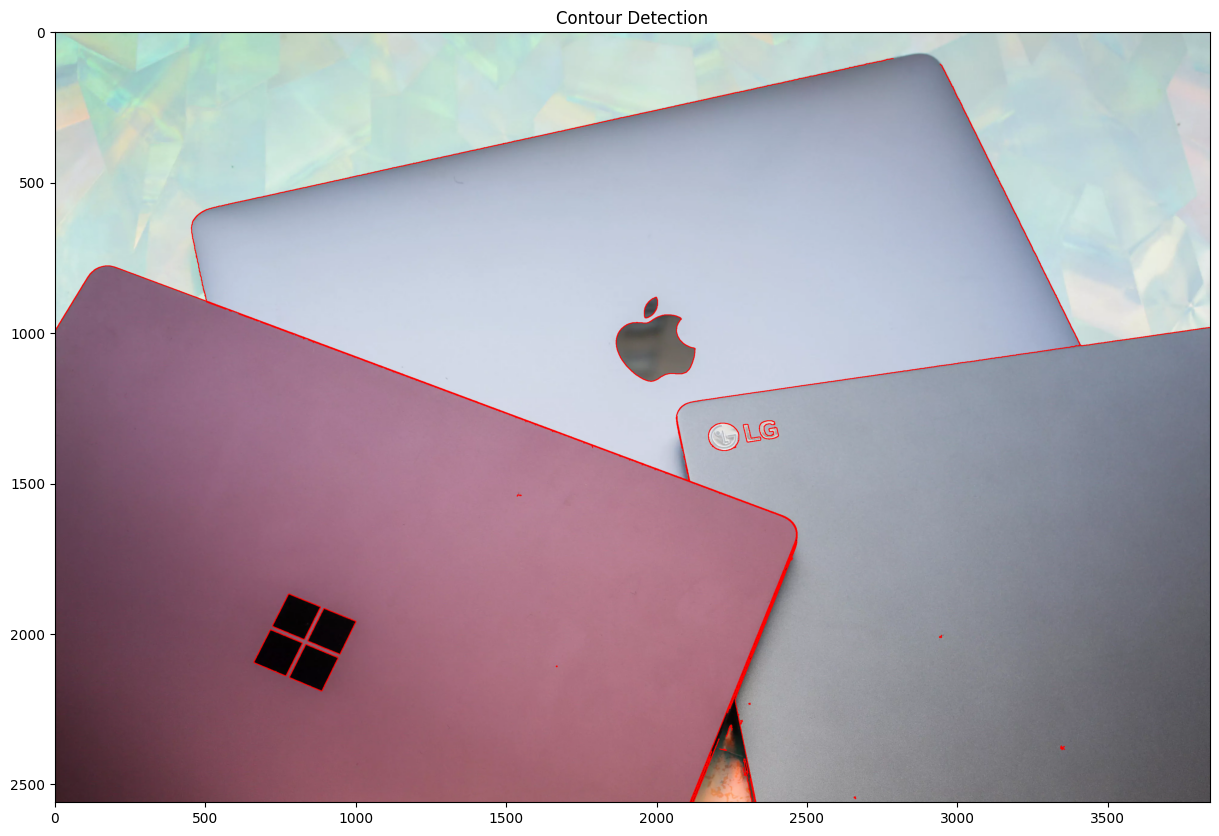

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load gambar laptop
img_path = '/content/drive/MyDrive/PCVK_Fara/Object Detection/laptop.jpg'
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Ambil tepi menggunakan Canny
edges = cv2.Canny(img_gray, 30, 200)

# Temukan kontur dalam gambar
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
img_contour = img.copy()
cv2.drawContours(img_contour, contours, -1, (0, 0, 255), 2)  # -1 untuk menggambar semua kontur

# Tampilkan hasil kontur detection
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection')
plt.show()


## **PENGAYAAN MATERI KTP**

**1. Import Library Image**

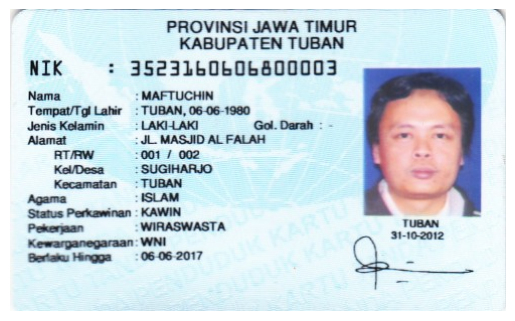

In [10]:
import cv2
import os

img = cv2.imread('/content/drive/MyDrive/PCVK_Fara/KTP/ktp3.png')

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

**2.  Lokalisasi dataset dan pembacaan file name di dalam direktori dataset**

In [12]:
# Lokasi hasil ktp
path_ktp = "/content/drive/MyDrive/PCVK_Fara/KTP"

# List untuk menyimpan nama file di direktori
file_names = []

# Looping file di direktori
for name_file in sorted(os.listdir(path_ktp)):
    # Mendapatkan path lengkap file
    file_path = os.path.join(path_ktp, name_file)

    # Membaca gambar dari file
    src = cv2.imread(file_path)

    # Check if image is successfully loaded
    if src is not None:
        # Operasi lain yang ingin Anda lakukan pada gambar
        blurred = src.copy()
        gray = blurred.copy()

        # Menambahkan nama file ke dalam list
        file_names.append(name_file)
    else:
        print(f"Failed to read image: {file_path}")

# Menampilkan daftar nama file
for file_name in file_names:
    print("Nama file:", file_name)

Nama file: KTP7.jpeg
Nama file: ktp.png
Nama file: ktp1.png
Nama file: ktp2.png
Nama file: ktp3.png
Nama file: ktp4.png
Nama file: ktp5.png
Nama file: ktp6.png


**3. Menerapkan Gaussian Blur**

In [13]:
# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(img, (5, 5), 0.5)

**4. Konversi grayscale untuk setiap hasil citra yang tereduksi noise dan binerisasi citra.**

168.0 (300, 493)


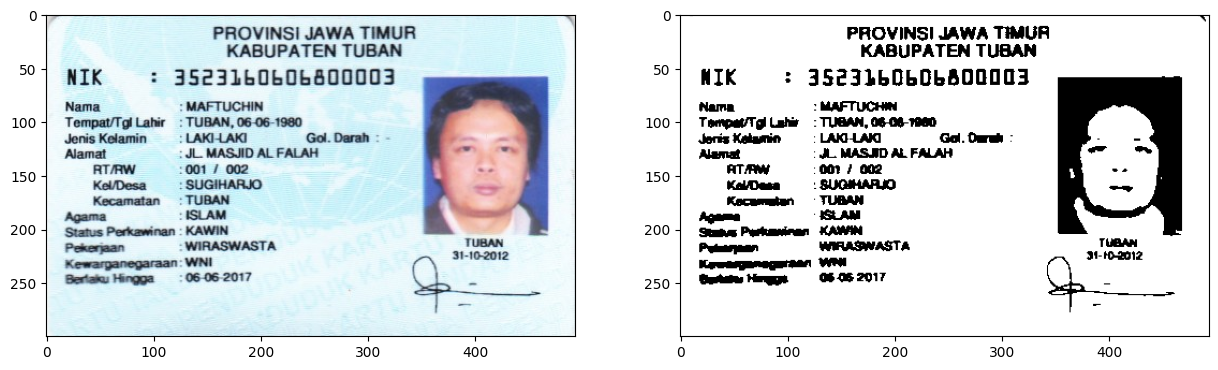

In [14]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)
# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

**5. Menerapkan morfologi**

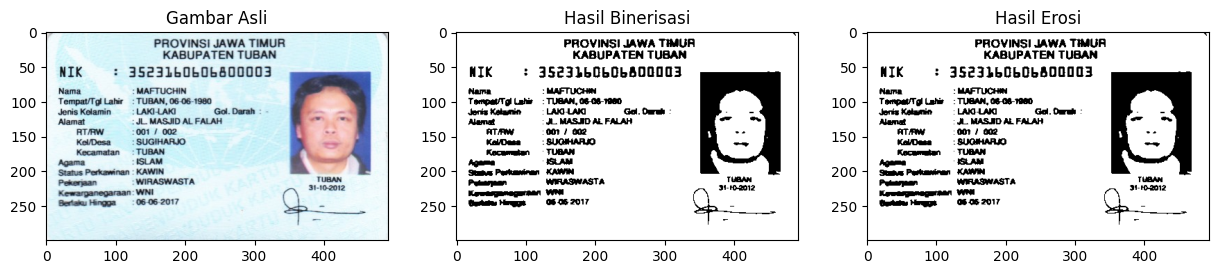

In [15]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

**6. Menerapkan ekstraksi kontur**

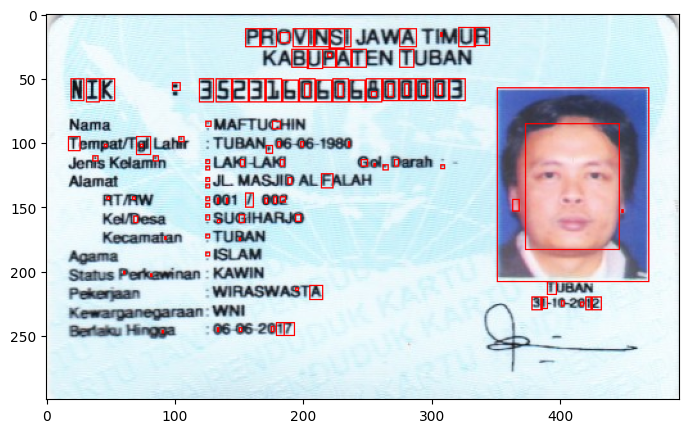

In [16]:
blurred = cv2.GaussianBlur(img, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## **Tugas Kelompok 5**
- Faradisha Aldina Putri
- Khafillah Akbar Syahputra
- M. Aristya

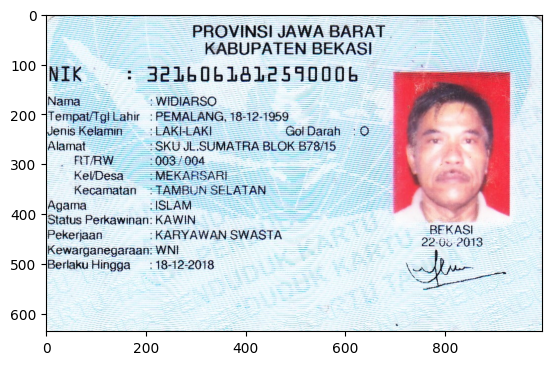

In [19]:
ktp_kelompok = cv2.imread('/content/drive/MyDrive/PCVK_Fara/KTP/ktp6.png')


# Tampilkan KTP
plt.imshow(cv2.cvtColor(ktp_kelompok, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
def extract_and_draw_contours(image):
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0.5)

    # Convert to grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

    # Thresholding using Otsu's method
    ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Erode the binary image
    erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

    # Extract contours
    contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    # Loop through contours
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        ras = format(w / h, '.2f')

        # Adjust the conditions based on your requirements
        if h >= 40 and w >= 10 and float(ras) <= 1:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
        elif h >= 8 and w >= 8 and float(ras) <= 10:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
        elif h >= 10 and w >= 7 and float(ras) <= 8:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

    return image

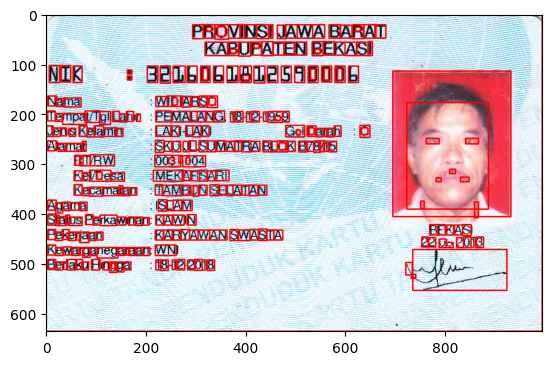

In [21]:
ktp_kelompok = cv2.imread('/content/drive/MyDrive/PCVK_Fara/KTP/ktp6.png')

# Call the function
result_image = extract_and_draw_contours(ktp_kelompok)
# Display the result
result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)
plt.show()